In [1]:
from fastai.vision.all import *

In [2]:
%matplotlib inline
%reload_ext autoreload

In [3]:
import torch

if torch.cuda.is_available():
    print(True) 


True


In [4]:
%cd /home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class_gray

/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class_gray


In [5]:
from pathlib import Path
path = Path('.')

In [6]:
# dls = ImageDataLoaders.from_folder(path, train='malformed_potatoes_fourier_2_class', valid_pct= 0.2, item_tfms=Resize(224))

dls = ImageDataLoaders.from_folder(path, train='malformed_potatoes_fourier_2_class', valid_pct= 0.3, shuffle=True, item_tfms=Resize(224), bs=32, seed=42)

In [7]:
dls.valid_ds

(#73) [(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1))...]

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [9]:
learn.fine_tune(10, base_lr=0.0002)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.900409,1.186167,0.671233,00:05
1,0.843646,1.052248,0.424658,00:05
2,0.719793,0.760239,0.342466,00:05
3,0.627312,0.498520,0.191781,00:04
4,0.521928,0.400055,0.164384,00:04
5,0.439962,0.386002,0.164384,00:05
6,0.376716,0.363411,0.136986,00:05
7,0.338101,0.343309,0.136986,00:05
8,0.291336,0.360217,0.109589,00:05
9,0.260514,0.369177,0.109589,00:05


SuggestedLRs(valley=0.00010964782268274575)

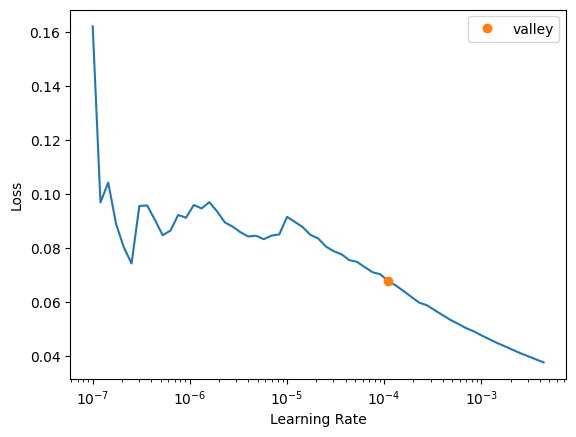

In [10]:
learn.lr_find()

In [11]:
learn.fine_tune(10, base_lr=0.00010964782268274575)

epoch,train_loss,valid_loss,error_rate,time
0,0.070720,0.350278,0.123288,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.187964,0.285184,0.109589,00:05
1,0.157982,0.269325,0.136986,00:05
2,0.128394,0.230876,0.123288,00:05
3,0.106952,0.180089,0.082192,00:05
4,0.090427,0.132470,0.041096,00:04
5,0.081232,0.105307,0.041096,00:05
6,0.076628,0.091534,0.027397,00:04
7,0.068161,0.085503,0.027397,00:04
8,0.060666,0.081432,0.027397,00:04
9,0.054379,0.080457,0.027397,00:05


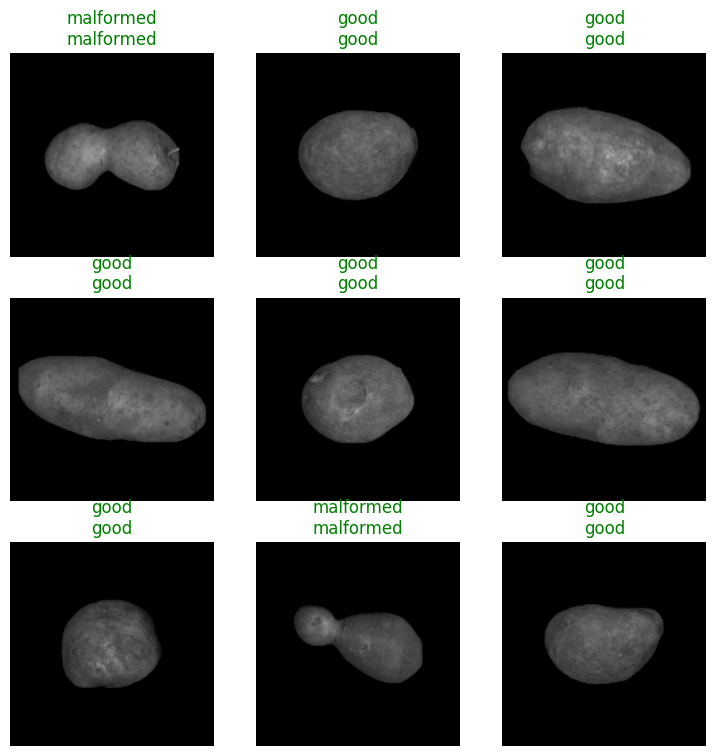

In [12]:
learn.show_results()

In [13]:
learn_accuracy = vision_learner(dls, resnet18, metrics=accuracy)

In [14]:
learn_accuracy.fine_tune(10, base_lr=0.0001)

epoch,train_loss,valid_loss,accuracy,time
0,1.283991,0.997293,0.547945,00:05
1,1.171628,1.013491,0.506849,00:04
2,1.021895,0.752418,0.575342,00:04
3,0.891251,0.602614,0.684932,00:05
4,0.810338,0.543507,0.712329,00:05
5,0.714890,0.508301,0.726027,00:05
6,0.651666,0.484870,0.726027,00:05
7,0.590533,0.417060,0.780822,00:05
8,0.545256,0.369513,0.808219,00:05
9,0.501071,0.346073,0.849315,00:04


SuggestedLRs(valley=0.00015848931798245758)

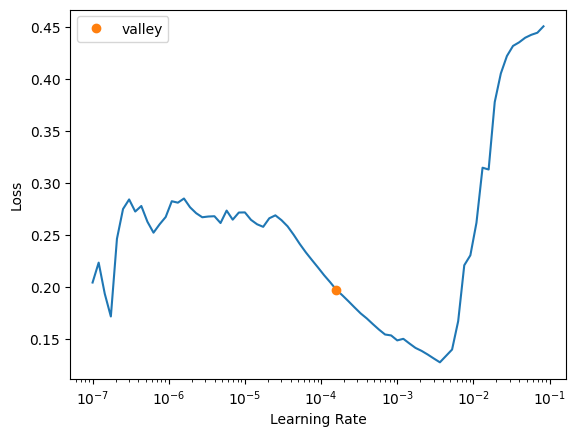

In [15]:
learn_accuracy.lr_find()

In [16]:
learn_accuracy.fine_tune(10, base_lr=0.00015848931798245758)

epoch,train_loss,valid_loss,accuracy,time
0,0.280694,0.290771,0.876712,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.277084,0.250638,0.904110,00:04
1,0.244170,0.220130,0.904110,00:05
2,0.212219,0.171751,0.931507,00:05
3,0.199978,0.146076,0.958904,00:05
4,0.182713,0.108251,0.958904,00:05
5,0.163707,0.088768,0.958904,00:05
6,0.151731,0.077809,0.958904,00:05
7,0.134542,0.068575,0.972603,00:04
8,0.123544,0.062036,0.986301,00:05
9,0.110167,0.059934,0.986301,00:05


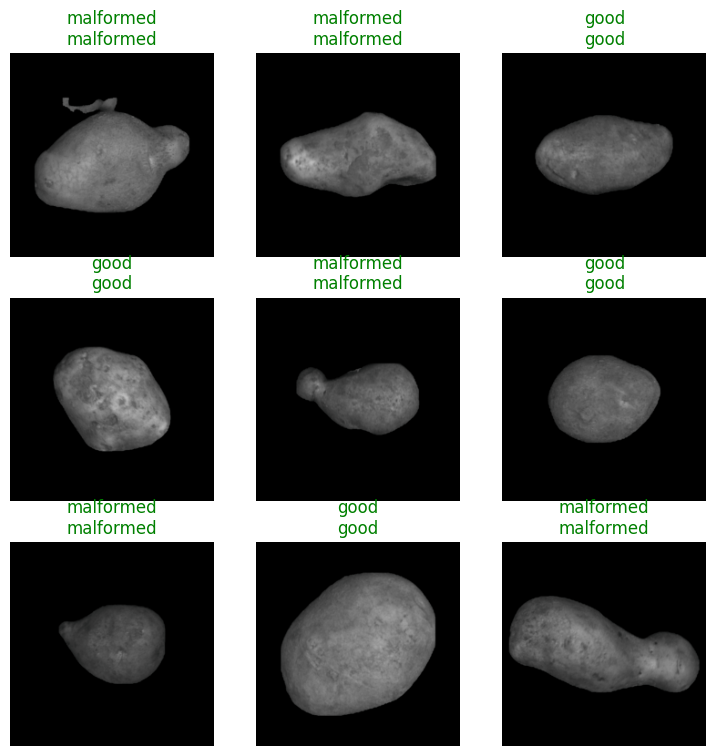

In [17]:
learn_accuracy.show_results()

In [18]:
# learn.predict('/home/mishkat/Downloads/potato_good_malformed/girl.png')
learn.predict("/home/mishkat/Downloads/potato_good_malformed/360_F_85799278_0BBGV9OAdQDTLnKwAPBCcg1J7QtiieJY.jpg")

('malformed', tensor(1), tensor([0.0565, 0.9435]))

In [19]:
learn_accuracy.export("/home/mishkat/Downloads/malformed_potato/potato_good_malformed/malformed_potatoes_fourier_2_class_gray/models/export_2_class_70:30_gray.pkl")

In [8]:
# Load Model
new_loaded_model = load_learner('/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/models/model_2_class_70_30_split.pth', cpu=True)

AttributeError: 'dict' object has no attribute 'dls'

In [22]:
test_loaded_model = load_learner('/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/test.pkl', cpu=True)

In [25]:
# test_loaded_model.predict("/home/mishkat/Downloads/potato_good_malformed/int_potato.jpg")
test_loaded_model.predict("/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/good/Afra_12_2_1_110_2.png")

('good', tensor(0), tensor([0.9976, 0.0024]))